In [1]:
# ruff: noqa: F401, E402
import math
import sys
from bisect import bisect_left, bisect_right
from collections import Counter, deque
from functools import cmp_to_key, lru_cache, reduce
from heapq import heapify, heappop, heappush, heappushpop, nsmallest
from importlib import reload
from itertools import (
    accumulate,
    chain,
    combinations,
    islice,
    pairwise,
    permutations,
    product,
    starmap,
    tee,
)
from math import comb, factorial, log, sqrt
from operator import add, and_, contains, indexOf, itemgetter, neg, or_, xor
from pprint import pprint
from typing import Callable, Iterable, List, Tuple

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

import arrays
import graphs
import lists
import mathematics
import matrix
import parsing
import search
import sequences
import sets
import strings
import trees

for m in (
    arrays,
    graphs,
    lists,
    mathematics,
    matrix,
    parsing,
    search,
    sequences,
    sets,
    strings,
    trees,
):
    reload(m)


from parsing import format_binop_expression, parse_binop_expression
from sequences import find_if
from strings import StringView, splint

print()


In [26]:
def critical_connections(adj: List[List[int]]) -> List[List[int]]:
    "Return a list of critical bridges in an undirected graph."
    # This uses single pass Tarjan's Algorithm.
    ct = [0] * len(adj)  # circle time for the parent/root of the whole circle
    vt = ct[:]
    t = 0  # visited node index time
    ccs = set()

    # Depth first search to determine the parent of each node
    # and created the DFS-tree.
    def visit(p, n):
        nonlocal t
        ct[n] = vt[n] = t = t + 1  # set the times
        for c in adj[n]:
            if not vt[c]:  # If the child node was not visited...
                visit(n, c)
                # If the child circle time is lower than ours,
                # it has reached another node up in the DFT-tree.
                # This indicates that we are in a circle with the child.
                ct[n] = min(ct[n], ct[c])
                # If the child is in a circle later than our visit time,
                # this means that child can only be visited through this node.
                if ct[c] > vt[n]:
                    ccs.add((n, c))
            elif c != p:  # visited node before
                # If we reached another node (but the parent) higher
                # in the DFS-tree, update our circle time.
                # Use the original visited time, given that
                # the child may be in another circle.
                ct[n] = min(ct[n], ct[c])

    # Start search from the first node (== 0).
    visit(-1, 0)
    return sorted(ccs)


In [65]:
def critical_connections(adj: List[List[int]]) -> List[List[int]]:
    "Return a list of critical bridges in an undirected graph."
    # This uses single pass Tarjan's Algorithm.
    # It expects a strongly connected undirected graph
    # with (directed) edges specified in `adj` one for each way.
    #
    # The idea is to DFS the graph and at each node to
    # to compute the minimum of child nodes connection times: `ct`.
    # If any child connects to a higher node in the stack,
    # its `ct` will be lower or equal to the parent visit time.
    # Otherwise, the child is only connected to the parent through
    # a critical edge.
    ct = [0] * len(adj)  # minimum connection time
    ccs = set()

    # Depth first search to determine the parent of each node
    # and created the DFS-tree.
    def visit(p, n, vt):
        # Skip visited nodes.
        if not ct[n]:
            ct[n] = vt  # initialize the ct time
            descend = lambda c: visit(n, c, vt + 1) if c != p else vt
            ct[n] = reduce(min, map(descend, adj[n]), vt)
            ccs.update((min(n, c), max(n, c)) for c in adj[n] if vt < ct[c])
        return ct[n]

    # Start search from the first node (== 0)
    # of the strongly connected graph.
    visit(-1, 0, 1)
    return sorted(ccs)


[(0, 1), (1, 2)]

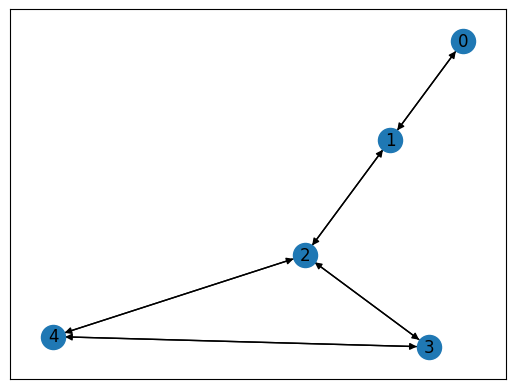

In [66]:
adj = [[1], [2, 0], [1, 3, 4], [2, 4], [2, 3]]
g = nx.DiGraph(dict(enumerate(adj)))
nx.draw_networkx(g)
critical_connections(adj)


[1, 1, 2, 7, 1, 1, 1, 2, 1]


[(3, 5)]

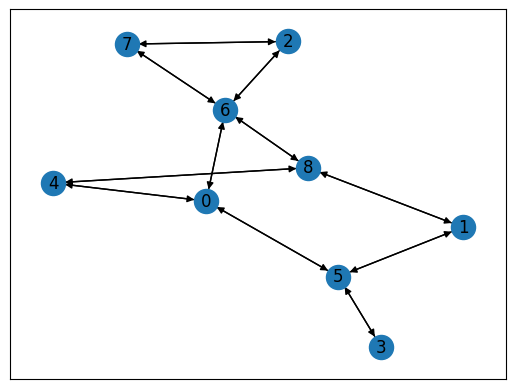

In [62]:
adj = [
    [6, 5, 4],
    [8, 5],
    [6, 7],
    [5],
    [8, 0],
    [0, 3, 1],
    [0, 8, 7, 2],
    [6, 2],
    [6, 4, 1],
]
g = nx.DiGraph(dict(enumerate(adj)))
nx.draw_networkx(g)
critical_connections(adj)


[1, 2, 3]


[(0, 1), (0, 2)]

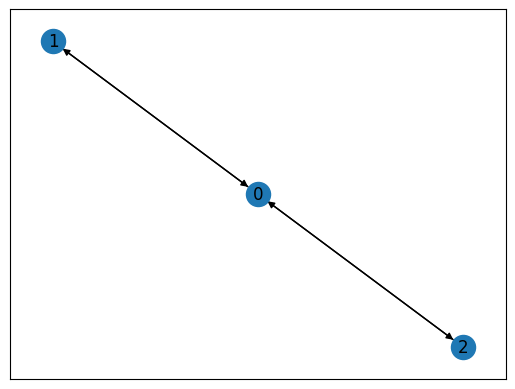

In [63]:
adj = [[1, 2], [0], [0]]
g = nx.DiGraph(dict(enumerate(adj)))
nx.draw_networkx(g)
critical_connections(adj)


[1, 1, 1, 4]


[(2, 3)]

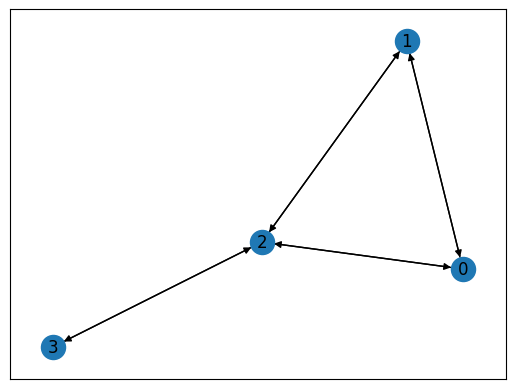

In [64]:
adj = [[1, 2], [0, 2], [0, 1, 3], [2]]
g = nx.DiGraph(dict(enumerate(adj)))
nx.draw_networkx(g)
critical_connections(adj)
